In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Real estate valuation data set.csv')
data.drop('No',axis=1,inplace=True)
data.head()

,X1 house age,X2 distance to the nearest MRT station,X3 no of convenience stores,X4 latitude,X5 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
co=[]

In [4]:
def Multiple_regression(X,Y):
    co=np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
    return co

In [5]:
X=data.drop('Y house price of unit area',axis=1).values
Y=data['Y house price of unit area'].values

In [6]:
co=Multiple_regression(X,Y)

In [7]:
print(co)

[-2.69471162e-01 -4.70565655e-03  1.15785279e+00  2.27111479e+02
 -4.63053119e+01]


In [8]:
b0=co[0]

In [9]:
b1=co[:]

In [10]:
def prediction(row):
    pred=b0
    for xi,bi in zip(row,b1):
        pred=pred+(bi*xi)
    return pred

In [11]:
y_pred=[]
for row in X:
    y_pred.append(prediction(row))

In [12]:
data_2=pd.DataFrame({'Actual':Y,'Predicted':np.ravel(y_pred)})
data_2

,Actual,Predicted
0,37.9,48.249379
1,42.2,48.850826
2,47.3,46.101650
3,54.8,46.101650
4,43.1,47.375159
...,...,...
409,15.4,15.070698
410,50.0,52.082373
411,40.6,46.058410
412,52.5,45.098485


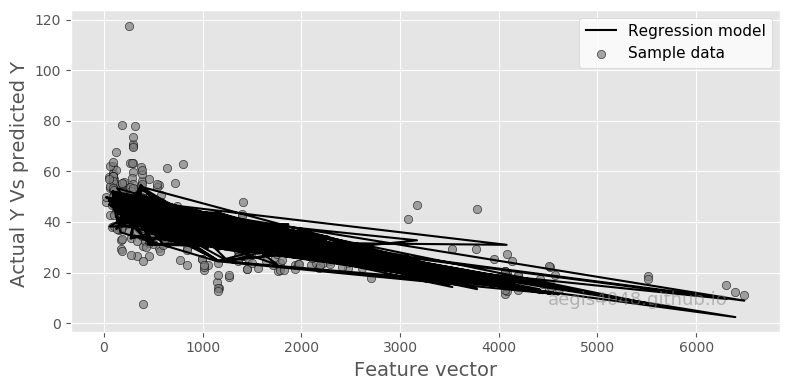

In [13]:
Xo=data['X2 distance to the nearest MRT station'].values
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(Xo,y_pred, color='k', label='Regression model')
ax.scatter(Xo,Y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Actual Y Vs predicted Y ', fontsize=14)
ax.set_xlabel('Feature vector', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

In [16]:
rmse = 0
k=0
for index,i in data_2.iterrows():
    k=k+1
    rmse += (i[0]- i[1])**2
    
rmse = np.sqrt(rmse/k)
print("The root mean square error is :",rmse)

The root mean square error is : 8.910529021693844
